In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [34]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [35]:
# Viewing data as df 
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)

measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [36]:
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [41]:
#Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
columns = inspector.get_columns("measurement")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [43]:
# Oldest date
earliest_date = session.query(Measurement.date).first()
earliest_date

('2010-01-01')

In [44]:
# Most recent date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [45]:
type(latest_date)

sqlalchemy.util._collections.result

In [46]:
latest_date[0]


'2017-08-23'

In [51]:
type(latest_date)


sqlalchemy.util._collections.result

In [52]:
#  Coverting latest date to datetime 
latest_date_dt = dt.datetime.strptime(latest_date[0], "%Y-%m-%d")

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_earlier = dt.date(latest_date_dt.year-1, latest_date_dt.month, latest_date_dt.day)
year_earlier

datetime.date(2016, 8, 23)

In [54]:
# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= (year_earlier)).all()
type(last_12_months)

list

In [55]:
for result in last_12_months:
    print(result)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-10-23', 0.02)
('2016-10-24', 0.08)
('2016-10-25', 0.11)
('2016-10-26', 0.01)
('2016-10-27', 0.22)
('2016-10-28', 0.05)
('2016-10-29', 0.1)
('2016-10-30', 0.16)
('2016-10-31', 0.07)
('2016-11-01', 0.1)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.03)
('2016-11-06', 0.01)
('2016-11-07', 0.0)
('2016-11-08', 0.21)
('2016-11-09', 0.11)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.0)
('2016-11-15', 0.0)
('2016-11-16', 0.24)
('2016-11-17', 0.01)
('2016-11-18', 0.0)
('2016-11-19', 0.11)
('2016-11-20', 0.39)
('2016-11-21', 0.11)
('2016-11-22', 2.05)
('2016-11-23', 0.25)
('2016-11-24', 0.3)
('2016-11-25', 0.08)
('2016-11-26', 0.06)
('2016-11-27', 0.17)
('2016-11-28', 0.0)
('2016-11-29', 0.09)
('2016-11-30', 0.05)
('2016-12-01', 0.37)
('2016-12-02', 0.35)
('2016-12-03', 0.77)
('2016-12-04', 0.04)
('2016-12-05', 0.22)
('2016-12-06', 0.0)
('2016-12-07', 0.12)
('2016-12-08', 0.07)
('2016-12-09', 0.31)
('2016-1

In [56]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df = last_12_months_df.set_index("date")

# Sort the dataframe by date
last_12_months_df = last_12_months_df.sort_index(ascending=True)
last_12_months_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<AxesSubplot:title={'center':'Rainfall vs Date'}, xlabel='date', ylabel='Inches'>

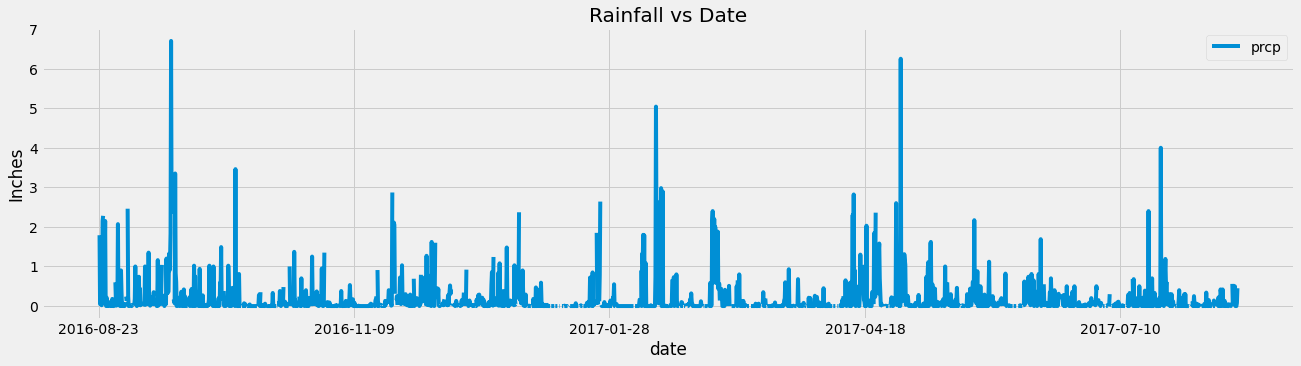

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = last_12_months_df.plot(figsize=(20, 5), title="Rainfall vs Date")
fig.set_ylabel("Inches")
fig

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_months_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [60]:
columns = inspector.get_columns("station")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [61]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).group_by(Station.station).count()
station_count

9

In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
active_stations[0][0]


'USC00519281'

In [66]:
# Using the most active station id from the previous query, 
# calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0][0]
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0][0]
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0][0]

print(f"Station: {most_active_station}")
print(f"Lowest temp: {min_temp}")
print(f"Highest temp: {max_temp}")
print(f"Average temp: {avg_temp}")

Station: USC00519281
Lowest temp: 54.0
Highest temp: 85.0
Average temp: 71.66378066378067


In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_year_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= (year_earlier)).all()

In [68]:
most_active_year_data_df = pd.DataFrame(most_active_year_data)
most_active_year_data_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


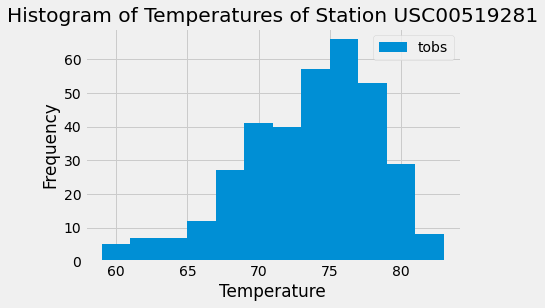

In [69]:
# Plotting as histogram
plt.hist(most_active_year_data_df["tobs"], bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Histogram of Temperatures of Station {most_active_station}")
plt.legend()
plt.show()

In [70]:
# Close Session
session.close()
